In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
from env import get_db_url
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_log_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
 7   id          847330 non-null  float64
 8   name        847330 non-null  object 
 9   slack       847330 non-null  object 
 10  start_date  847330 non-null  object 
 11  end_date    847330 non-null  object 
 12  created_at  847330 non-null  object 
 13  updated_at  847330 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  847330 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 109.9+ MB


#### initial thoughts
- the columns with 900223, only 5 of them and all other columns aside from deleted_at have 847330
- I want to look into this a little further to make sure we wouldn't be losing something important, but could consider dropping, especially for MVP
- deleted_at column should be dropped
- data, time, start_date, end_date, created_at, updated_at - by the names of these columns, thinking can convert to datetime
- path probably makes sense to stay object, but can we potentially look at groups/feature eng columns here? possibility to keep in mind
- user_id as int - this is fine for now, but want to make sure this is not treated as continuous I'm thinking
- cohort id- could potentially change the float out with the actual cohort name
- ip - probably good, also potential for feature eng... like if we want to look at different area of users. here is a good site to help https://www.whatismyip.com/ip-address-lookup/
- program_id - fine, but also can change to program name if we'd like

#### Histogram

In [4]:
df.date.head()

0    2018-01-26
1    2018-01-26
2    2018-01-26
3    2018-01-26
4    2018-01-26
Name: date, dtype: object

In [5]:
df.time.head()

0    09:55:03
1    09:56:02
2    09:56:05
3    09:56:06
4    09:56:24
Name: time, dtype: object

In [6]:
df.start_date.head()

0    2015-09-22
1    2015-09-22
2    2015-09-22
3    2015-09-22
4    2018-01-08
Name: start_date, dtype: object

In [7]:
df.end_date.head()

0    2016-02-06
1    2016-02-06
2    2016-02-06
3    2016-02-06
4    2018-05-17
Name: end_date, dtype: object

In [8]:
df.created_at.head()

0    2016-06-14 19:52:26
1    2016-06-14 19:52:26
2    2016-06-14 19:52:26
3    2016-06-14 19:52:26
4    2018-01-08 13:59:10
Name: created_at, dtype: object

In [9]:
df.updated_at.head()

0    2016-06-14 19:52:26
1    2016-06-14 19:52:26
2    2016-06-14 19:52:26
3    2016-06-14 19:52:26
4    2018-01-08 13:59:10
Name: updated_at, dtype: object

In [10]:
df[['date', 'start_date', 'end_date', 'created_at', 'updated_at']] = df[['date','start_date', 'end_date', 'created_at', 'updated_at']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [11]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S' ).apply(pd.Timestamp)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  900223 non-null  int64         
 1   date        900223 non-null  datetime64[ns]
 2   time        900223 non-null  datetime64[ns]
 3   path        900222 non-null  object        
 4   user_id     900223 non-null  int64         
 5   cohort_id   847330 non-null  float64       
 6   ip          900223 non-null  object        
 7   id          847330 non-null  float64       
 8   name        847330 non-null  object        
 9   slack       847330 non-null  object        
 10  start_date  847330 non-null  datetime64[ns]
 11  end_date    847330 non-null  datetime64[ns]
 12  created_at  847330 non-null  datetime64[ns]
 13  updated_at  847330 non-null  datetime64[ns]
 14  deleted_at  0 non-null       float64       
 15  program_id  847330 non-null  float64       
dtypes:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  900223 non-null  int64         
 1   date        900223 non-null  datetime64[ns]
 2   time        900223 non-null  datetime64[ns]
 3   path        900222 non-null  object        
 4   user_id     900223 non-null  int64         
 5   cohort_id   847330 non-null  float64       
 6   ip          900223 non-null  object        
 7   id          847330 non-null  float64       
 8   name        847330 non-null  object        
 9   slack       847330 non-null  object        
 10  start_date  847330 non-null  datetime64[ns]
 11  end_date    847330 non-null  datetime64[ns]
 12  created_at  847330 non-null  datetime64[ns]
 13  updated_at  847330 non-null  datetime64[ns]
 14  deleted_at  0 non-null       float64       
 15  program_id  847330 non-null  float64       
dtypes:

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'cohort_id'}>,
        <AxesSubplot:title={'center':'id'}>],
       [<AxesSubplot:title={'center':'start_date'}>,
        <AxesSubplot:title={'center':'end_date'}>,
        <AxesSubplot:title={'center':'created_at'}>],
       [<AxesSubplot:title={'center':'updated_at'}>,
        <AxesSubplot:title={'center':'deleted_at'}>,
        <AxesSubplot:title={'center':'program_id'}>]], dtype=object)

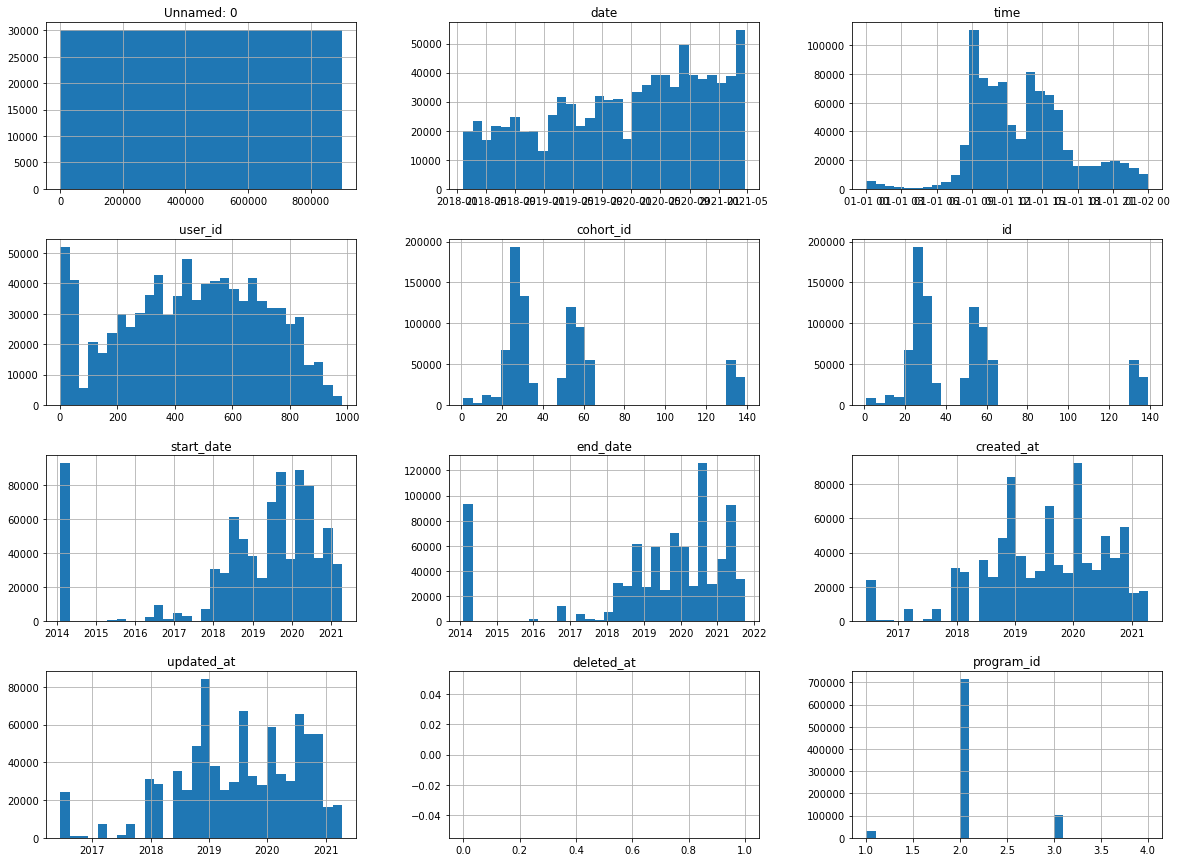

In [14]:
df.hist(bins=30, figsize=(20, 15))

In [15]:
df.date.min() , df.date.max()

(Timestamp('2018-01-26 00:00:00'), Timestamp('2021-04-21 00:00:00'))

In [16]:
df.start_date.min() , df.start_date.max()

(Timestamp('2014-02-04 00:00:00'), Timestamp('2021-04-12 00:00:00'))

In [17]:
df.end_date.min() , df.end_date.max()

(Timestamp('2014-02-04 00:00:00'), Timestamp('2021-10-01 00:00:00'))

In [18]:
df.time.head()

0   1900-01-01 09:55:03
1   1900-01-01 09:56:02
2   1900-01-01 09:56:05
3   1900-01-01 09:56:06
4   1900-01-01 09:56:24
Name: time, dtype: datetime64[ns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  900223 non-null  int64         
 1   date        900223 non-null  datetime64[ns]
 2   time        900223 non-null  datetime64[ns]
 3   path        900222 non-null  object        
 4   user_id     900223 non-null  int64         
 5   cohort_id   847330 non-null  float64       
 6   ip          900223 non-null  object        
 7   id          847330 non-null  float64       
 8   name        847330 non-null  object        
 9   slack       847330 non-null  object        
 10  start_date  847330 non-null  datetime64[ns]
 11  end_date    847330 non-null  datetime64[ns]
 12  created_at  847330 non-null  datetime64[ns]
 13  updated_at  847330 non-null  datetime64[ns]
 14  deleted_at  0 non-null       float64       
 15  program_id  847330 non-null  float64       
dtypes:

In [20]:
df['path'].nunique()

2313

<AxesSubplot:>

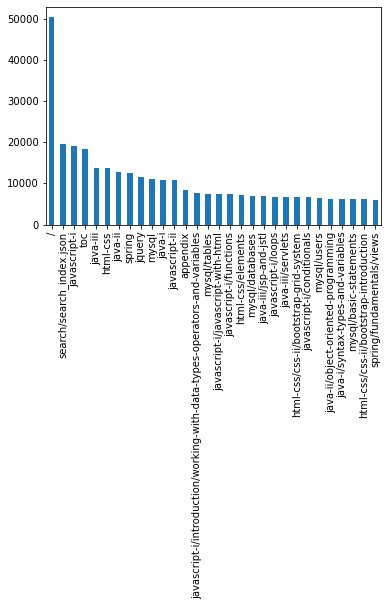

In [21]:
df['path'].value_counts()[:30].plot(kind='bar')

In [22]:
df.ip.nunique()

5531

<AxesSubplot:>

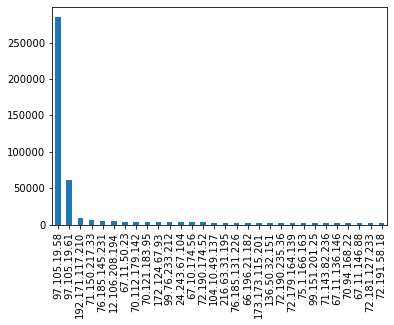

In [23]:
df['ip'].value_counts()[:30].plot(kind='bar')

note - interesting the one ip address and the second highest too. maybe the instructors share one often working from same comp? or could be a scraping thing. keep in mind

In [24]:
df.name.nunique()

47

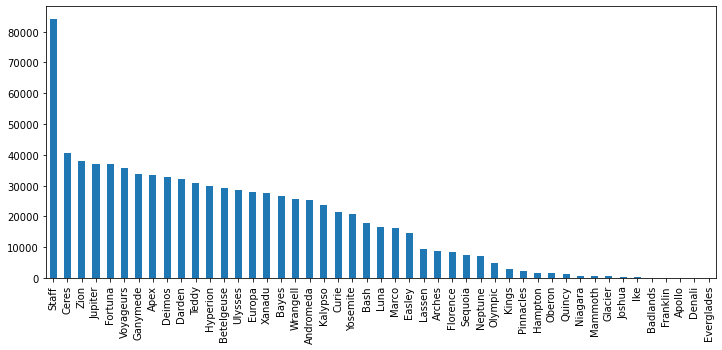

In [25]:
df['name'].value_counts()[:47].plot(kind='bar', figsize=(12,5))
plt.show()

<AxesSubplot:>

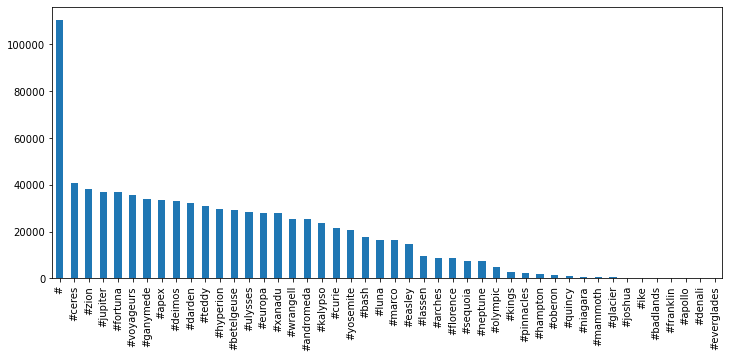

In [26]:
df['slack'].value_counts().plot(kind='bar', figsize=(12,5))

In [27]:
df['slack'] = df['slack'].str[1:]

In [28]:
df.slack.value_counts()

              110569
ceres          40730
zion           38096
jupiter        37109
fortuna        36902
voyageurs      35636
ganymede       33844
apex           33568
deimos         32888
darden         32015
teddy          30926
hyperion       29855
betelgeuse     29356
ulysses        28534
europa         28033
xanadu         27749
wrangell       25586
andromeda      25359
kalypso        23691
curie          21582
yosemite       20743
bash           17713
luna           16623
marco          16397
easley         14715
lassen          9587
arches          8890
florence        8562
sequoia         7444
neptune         7276
olympic         4954
kings           2845
pinnacles       2158
hampton         1712
oberon          1672
quincy          1237
niagara          755
mammoth          691
glacier          598
joshua           302
ike              253
badlands          93
franklin          72
apollo             5
denali             4
everglades         1
Name: slack, dtype: int64

In [29]:
df['slack'] = df.slack.replace({'taff': 'staff'})

In [30]:
df['slack'].value_counts()

              110569
ceres          40730
zion           38096
jupiter        37109
fortuna        36902
voyageurs      35636
ganymede       33844
apex           33568
deimos         32888
darden         32015
teddy          30926
hyperion       29855
betelgeuse     29356
ulysses        28534
europa         28033
xanadu         27749
wrangell       25586
andromeda      25359
kalypso        23691
curie          21582
yosemite       20743
bash           17713
luna           16623
marco          16397
easley         14715
lassen          9587
arches          8890
florence        8562
sequoia         7444
neptune         7276
olympic         4954
kings           2845
pinnacles       2158
hampton         1712
oberon          1672
quincy          1237
niagara          755
mammoth          691
glacier          598
joshua           302
ike              253
badlands          93
franklin          72
apollo             5
denali             4
everglades         1
Name: slack, dtype: int64

In [31]:
df['slack'].groupby(df.name).max()

name
Andromeda      andromeda
Apex                apex
Apollo            apollo
Arches            arches
Badlands        badlands
Bash                bash
Bayes                   
Betelgeuse    betelgeuse
Ceres              ceres
Curie              curie
Darden            darden
Deimos            deimos
Denali            denali
Easley            easley
Europa            europa
Everglades    everglades
Florence        florence
Fortuna          fortuna
Franklin        franklin
Ganymede        ganymede
Glacier          glacier
Hampton          hampton
Hyperion        hyperion
Ike                  ike
Joshua            joshua
Jupiter          jupiter
Kalypso          kalypso
Kings              kings
Lassen            lassen
Luna                luna
Mammoth          mammoth
Marco              marco
Neptune          neptune
Niagara          niagara
Oberon            oberon
Olympic          olympic
Pinnacles      pinnacles
Quincy            quincy
Sequoia          sequoia
Staff               

In [32]:
df.cohort_id.nunique()

47

In [33]:
df['slack'].nunique(), df.name.nunique()

(46, 47)

this is what's not right 

Bayes              staff

should be fine just using name as it's basically the same, but has bayes and staff

summary so far-
- datatypes for date time
- drop slack
- drop delete column
- drop the null values 
- should be about 850k records
- look at dtypes closely and make changes where desired (maybe name instead of number for a couple)
- maybe change name to cohort, lower case
- cohort id corresponds to name. do you need both? probably ok to keep both incase
- keep the couple very high counts ip addresses in mind
- talk with group about what they found and put in function
